In [45]:
#!pip install keras

In [46]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#reading csv file
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
#splitting data into x
x=df.iloc[:,3:13].values


In [49]:
#splitting data into y
y=df.iloc[:,13]


In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
labelencoder_cs=LabelEncoder()

In [52]:
x[:,1]=labelencoder_cs.fit_transform(x[:,1])

In [53]:
labelencoder_gender=LabelEncoder()

In [54]:
x[:,2]=labelencoder_gender.fit_transform(x[:,2])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss= StandardScaler()

In [59]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/gaurav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [62]:
classifier=Sequential()

In [63]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_dim=10))

In [64]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))

In [65]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [66]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [67]:
classifier.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,)

In [68]:
model_history=classifier.fit(x_train,
    y_train,
    batch_size=10,
    epochs=100,
    verbose=1,
    callbacks=None,
    validation_split=0.33,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 2s 322us/step - loss: 0.5410 - accuracy: 0.7970 - val_loss: 0.4925 - val_accuracy: 0.7962
Epoch 2/100
4689/4689 [==============================] - 1s 260us/step - loss: 0.4762 - accuracy: 0.7985 - val_loss: 0.4677 - val_accuracy: 0.7962
Epoch 3/100
4689/4689 [==============================] - 1s 294us/step - loss: 0.4556 - accuracy: 0.7985 - val_loss: 0.4556 - val_accuracy: 0.7962
Epoch 4/100
4689/4689 [==============================] - 1s 286us/step - loss: 0.4456 - accuracy: 0.7985 - val_loss: 0.4490 - val_accuracy: 0.7962
Epoch 5/100
4689/4689 [==============================] - 1s 260us/step - loss: 0.4390 - accuracy: 0.7985 - val_loss: 0.4449 - val_accuracy: 0.7962
Epoch 6/100
4689/4689 [==============================] - 1s 263us/step - loss: 0.4346 - accuracy: 0.8000 - val_loss: 0.4427 - val_accuracy: 0.7992
Epoch 7/100
4689/4689 [==============================] - 1s 263us/step

In [69]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


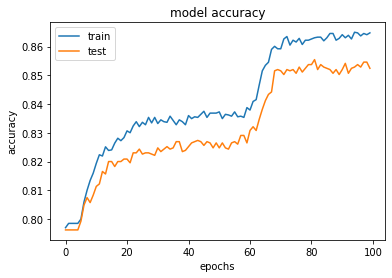

In [70]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

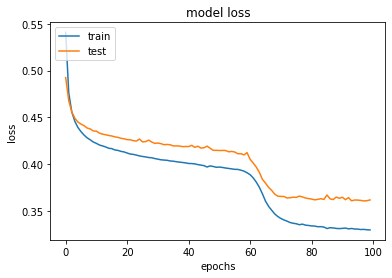

In [71]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')

In [72]:
pred_y=classifier.predict(x_test)
pred_y=(pred_y>0.5)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [74]:
cm=confusion_matrix(y_test,pred_y)
cm

array([[2297,   82],
       [ 338,  283]])

In [76]:
score=accuracy_score(y_test,pred_y)
score*100

86.0